<a href="https://colab.research.google.com/github/NumanHR/Challenger2022/blob/main/ChallengerClimac2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
%matplotlib inline
#from scipy import stats
#import warnings

In [ ]:
cd "C:\Users\DELL\OneDrive\Estudios 2022\Estudio Ulacit\Inteligencia de Negocios\Challenge 2022\hakkathon-energy-data\CR_Balance_Nacional_de_Energa_2012_2018"

[Errno 2] No such file or directory: 'C:\\Users\\DELL\\OneDrive\\Estudios 2022\\Estudio Ulacit\\Inteligencia de Negocios\\Challenge 2022\\hakkathon-energy-data\\CR_Balance_Nacional_de_Energa_2012_2018'
/content


In [21]:
f1='Centros de transf. por sector.csv'
f2='DataCentrosTransformación.csv'
f3='Consumo final por sector.csv'
f4='DataConsumoFinal.csv'
f5='DataConsumoxTipoFuente.csv'
f6='DataImportaciones.csv'
f7='DataGeneraciónxTipoFuente.csv'
f8='DataIndustria.csv'
f9='DataOferta.csv'
f10='DataResidencial.csv'
f11='DataTransporte.csv'

In [4]:
DataCentroTranfxSector = pd.read_csv(f1, sep=",", decimal=".", thousands=",")

In [5]:
DataCentroTranfxSector

,Año,Carboneras,Refinerías,Centrales Eléctricas Sector Público,Centrales Eléctricas Sector Privado,Destilerías
0,2010,-125.0,-300.0,-38773.0,-5389.0,597.0
1,2011,-97.0,-39.0,-39212.0,-5511.0,632.0
2,2012,-107.0,0.0,-42701.0,-5794.0,742.0
3,2013,-115.0,0.0,-46583.0,-5776.0,742.0
4,2014,-141.0,0.0,-45971.0,-5693.0,705.0
5,2015,-171.0,0.0,-40774.0,-6660.0,705.0
6,2016,-134.0,0.0,-40582.0,-7585.0,630.0
7,2017,-65.0,0.0,-41318.0,-6830.0,630.0
8,2018,-25.0,0.0,-29583.0,-1877.0,608.0


In [6]:
DataCentroTranfxSector.dtypes

Año                                      int64
Carboneras                             float64
Refinerías                             float64
Centrales Eléctricas Sector Público    float64
Centrales Eléctricas Sector Privado    float64
Destilerías                            float64
dtype: object

In [7]:
DataCentroTranf = pd.read_csv(f2, sep=",", decimal=".", thousands=",")

In [8]:
DataCentroTranf

,Descripción,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Carboneras,-125,-97,-107,-115,-141,-171,-134,-65,-25
1,Centrales Biomasa,-523,-493,-673,-656,-598,-671,-699,-652,-691
2,Centrales Eléctricas Sector Privado,-5389,-5511,-5794,-5776,-5693,-6660,-7585,-6830,-1877
3,Centrales Eléctricas Sector Público,-38773,-39212,-42701,-46583,-45971,-40774,-40582,-41318,-29583
4,Centrales Eólicas,0,0,0,0,0,0,0,0,0
5,Centrales Geotérmicas,-32779,-34249,-39346,-38935,-38868,-38857,-38809,-39608,-27351
6,Centrales Geotermicas (Miravalles III),-3986,-4191,-4259,-4259,-4249,-4845,-5022,-5022,0
7,Centrales Hidroeléctricas,-1970,-583,35,-2031,-1994,-2503,-2649,-2622,-2599
8,Centrales Solares,0,0,0,0,0,0,0,0,0
9,Centrales Termoeléctricas,-4905,-5206,-4251,-6477,-5955,-558,-987,-244,-818


In [9]:
DataCentroTranf.dtypes

Descripción    object
2010            int64
2011            int64
2012            int64
2013            int64
2014            int64
2015            int64
2016            int64
2017            int64
2018            int64
dtype: object

In [10]:
DataCentroTranf =DataCentroTranf[["2010", "2011","2012","2013","2014","2015","2016","2017","2018"]].astype(float, errors = 'raise')

In [11]:
DataCentroTranf.dtypes

2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016    float64
2017    float64
2018    float64
dtype: object

In [12]:
datos = DataCentroTranf.describe()
datos.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,-10210.846154,-10292.846154,-11150.384615,-12043.384615,-11889.923077,-10918.307692,-11087.538462,-11072.538462,-7216.923077
std,16543.138532,16885.870755,18681.615297,19690.188320,19495.246410,18175.501114,18210.655588,18453.056118,12744.856632
min,-44588.000000,-44858.000000,-48601.000000,-52474.000000,-51805.000000,-47604.000000,-48301.000000,-48212.000000,-31484.000000
25%,-5389.000000,-5511.000000,-5794.000000,-6477.000000,-5955.000000,-6660.000000,-7585.000000,-6830.000000,-2599.000000


In [14]:
ConsumoFinalxSector = pd.read_csv(f3, sep=",", decimal=".", thousands=",")

In [15]:
ConsumoFinalxSector

,Año,Residencial,Servicios,Comercial,Público,Transporte,Industria,Agropecuario
0,2010,23382.0,6146.0,3513.0,3869.0,70319.0,37995.0,2854.0
1,2011,22139.0,6087.0,3479.0,3951.0,72109.0,36973.0,3092.0
2,2012,21586.0,6206.0,3636.0,4230.0,74111.0,37740.0,3242.0
3,2013,21366.0,6246.0,3870.0,4296.0,74637.0,38994.0,3273.0
4,2014,20603.0,6417.0,3980.0,4454.0,76186.0,39206.0,3254.0
5,2015,20791.0,6671.0,4114.0,4575.0,81526.0,38368.0,3327.0
6,2016,20620.0,7042.0,4306.0,4687.0,87538.0,39728.0,3584.0
7,2017,20652.0,7175.0,4322.0,4690.0,89061.0,40047.0,3761.0
8,2018,19481.0,7303.0,4464.0,4803.0,91231.0,39262.0,3337.0


In [16]:
DataConsumoxTipoFuente = pd.read_csv(f5, sep=",", decimal=".", thousands=",")

In [17]:
DataConsumoxTipoFuente

,Año,Bagazo,Av-Gas,Carbón Mineral,Carbón Vegetal,Casc. de Café,Coque,Diesel,Electricidad,Fuel Oil,G.L.P,Gasoleo,Gasolina Regular,Gasolina Súper,Jet Fuel,Kerosene,Leña,Otros Res. Veg.,Total,Biogas
0,2010,9836.32,58.09,29.89,41.80,375.26,2675.36,37366.90,30832.33,5037.69,5404.43,230.96,19138.93,12426.14,7138.21,128.74,13998.14,4395.70,149114.89,0.00
1,2011,7729.44,55.96,229.20,32.34,407.07,3717.92,37846.49,31223.25,4776.77,5542.26,253.23,19073.05,13200.62,7436.25,164.18,12839.58,4448.78,148979.37,2.99
2,2012,8088.95,54.38,91.97,35.59,461.19,3382.79,38341.17,32468.42,5038.86,5708.17,280.72,19309.81,14356.44,7369.51,282.75,12161.88,4385.46,151821.08,3.03
3,2013,9864.93,52.24,204.32,38.29,461.19,3359.27,38437.05,32767.30,4530.13,6032.98,285.36,19657.83,14599.83,6869.56,257.25,12059.79,4161.97,153642.31,3.03
4,2014,10318.32,48.56,248.10,47.01,371.96,3288.28,39234.72,31149.97,4184.00,6479.78,275.64,19525.17,15559.74,6937.01,261.09,11066.46,4360.37,155359.20,3.03
5,2015,10072.36,48.37,14.00,56.85,371.37,3211.70,41315.37,33942.28,4199.91,6817.76,250.41,20132.66,17866.27,7575.90,303.50,10825.70,3789.58,160797.02,3.03
6,2016,10072.36,49.15,13.51,44.58,437.15,3493.96,43900.44,35225.10,4287.28,7464.69,290.26,20419.83,20610.48,8462.44,287.68,10170.89,3742.20,168975.04,3.03
7,2017,9359.19,53.16,214.02,46.34,400.44,3786.46,44661.06,35642.33,4273.74,7934.88,372.48,20565.07,21401.84,8446.03,275.21,10211.16,3329.99,170976.41,3.03
8,2018,9134.57,41.04,13.87,42.19,347.55,3534.58,44766.79,35958.98,4107.84,8215.20,393.71,20563.59,21740.81,9379.58,245.85,8603.49,3224.83,170317.49,3.03
9,2019,9060.66,41.83,10.19,38.18,372.59,1728.44,44303.51,36573.21,4145.23,8736.27,391.21,21566.84,22426.14,9973.41,204.06,8582.54,3258.67,171416.03,3.03


In [18]:
Dataimportaciones = pd.read_csv(f6, sep=",", decimal=".", thousands=",")
Dataimportaciones

,Año,Importaciones (TJ)
0,2010,104818.94
1,2011,105991.40
2,2012,105521.89
3,2013,108967.28
4,2014,112928.31
5,2015,107389.30
6,2016,115170.04
7,2017,122745.30
8,2018,117521.10
9,2019,123790.75


In [19]:
DataGenereacionxTipoFuente= pd.read_csv(f7, sep=",", decimal=".", thousands=",")
DataGenereacionxTipoFuente

,Año,Biomasa,Eólica,Hidro,Geotérmica,Solar,Térmica,Total
0,2010,521.41,1291.23,26144.25,4233.89,0.93,2308.23,34499.95
1,2011,500.37,1492.11,25684.64,4606.35,1.73,3108.03,35393.24
2,2012,643.04,1902.18,26039.52,5049.18,4.67,2989.02,36627.60
3,2013,659.94,1744.45,24663.76,5460.25,8.80,4305.59,36842.78
4,2014,650.24,2645.11,24181.75,5537.29,8.88,3755.53,36778.79
5,2015,645.38,3886.23,29039.71,4952.26,9.12,389.23,38921.94
6,2016,617.42,4130.25,28893.40,4822.25,8.69,694.89,39166.91
7,2017,664.24,4635.64,31237.06,4024.20,16.03,134.70,40711.86
8,2018,625.19,6475.95,30034.43,3486.85,201.76,570.78,41394.96
9,2019,608.57,6466.84,28175.98,5445.27,215.35,344.29,41256.29


In [22]:
DataIndustria = pd.read_csv(f8, sep=",", decimal=".", thousands=",")
DataIndustria

,Año,1. Produc.de alimentos y tabaco (CIIU 31),2. Producción de textiles y cuero (CIIU 32),3. Producción de madera (CIIU 33),4. Producción de papel (CIIU 34),5. Producción de químicos (CIIU 35),6. Otras industrias (CIIU 36-39)
0,2010,22612,918,3485,1070,2076,7833
1,2018,20442,876,5086,1366,1974,9518
2,2016,20435,841,5704,1311,1899,9538
3,2017,20367,868,5131,1359,2084,10238
4,2014,19986,787,6055,1220,1948,9210
5,2015,19956,810,5534,1257,1870,8941
6,2013,19839,838,5877,1223,2000,9218
7,2012,18489,882,5917,1126,2069,9257
8,2011,17734,886,5713,1061,2048,9532


In [23]:
DataOferta = pd.read_csv(f9, sep=",", decimal=".", thousands=",")
DataOferta

,Año,Exportación,Importación,No aprovechada,Oferta Interna,Producción,Transferencias,Variación de Inventario
0,2010,5789,104819,22529,200729,124793,53,-617
1,2011,3469,105991,24332,198937,121627,44,-924
2,2012,4902,105522,21636,204848,123614,-230,2479
3,2013,4600,108967,20261,211549,125407,75,1960
4,2014,2826,112928,19382,213919,125189,72,-2063
5,2015,2950,107389,17392,215063,128647,77,-707
6,2016,2925,115170,17392,224733,129472,-13,420
7,2017,3231,122745,19280,230558,132627,-56,-2246
8,2018,3462,117521,17886,211896,113220,-16,2519


In [24]:
DataResidencial = pd.read_csv(f10, sep=",", decimal=".", thousands=",")
DataResidencial
#DataResidencial.

,Año,1. Urbano,2. Rural
0,2010,10514,12868
1,2011,11513,10626
2,2012,11950,9636
3,2013,12090,9276
4,2014,12606,7996
5,2015,13197,7594
6,2016,13459,7161
7,2017,13687,6964
8,2018,13521,5959


In [25]:
DataTransporte = pd.read_csv(f11, sep=",", decimal=".", thousands=",")
DataTransporte

,Año,Marítimo,Terrestre,Aéreo
0,2010,85,63360,6874
1,2011,84,64876,7149
2,2012,56,66765,7290
3,2013,90,67772,6775
4,2014,78,69263,6845
5,2015,91,73986,7448
6,2016,58,79120,8360
7,2017,65,80669,8327
8,2018,51,81953,9227


In [26]:
DataConsumoFinal = pd.read_csv(f4, sep=",", decimal=".", thousands=",")
DataConsumoFinal.dtypes

Descripción    object
2010            int64
2011            int64
2012            int64
2013            int64
2014            int64
2015            int64
2016            int64
2017            int64
2018            int64
dtype: object

In [27]:
DataConsumoFinal.head(80)

,Descripción,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,1. Privado,29474,31122,32601,33280,34096,36899,39762,40694,41241
1,1. Produc.de alimentos y tabaco (CIIU 31),22612,17734,18489,19839,19986,19956,20435,20367,20442
2,1. Urbano,10514,11513,11950,12090,12606,13197,13459,13687,13521
3,1.a Automóviles,20541,19422,19899,19828,20253,21883,23502,24012,24251
4,1.a Cocción,2076,2078,2154,2264,2463,2588,2916,2943,3138
...,...,...,...,...,...,...,...,...,...,...
74,Público,3869,3951,4230,4296,4454,4575,4687,4690,4803
75,Residencial,23382,22139,21586,21366,20603,20791,20620,20652,19481
76,Servicios,6146,6087,6206,6246,6417,6671,7042,7175,7303
77,Terrestre,63360,64876,66765,67772,69263,73986,79120,80669,81953


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


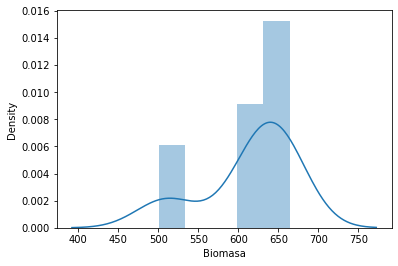

In [28]:
ST=DataGenereacionxTipoFuente.drop([10],axis=0)
sns.distplot(ST['Biomasa'])

In [32]:
var='Térmica'


In [33]:
data= pd.concat([ST['Hidro'],ST[var]],axis=1)
data.head(50)

,Hidro,Térmica
0,26144.25,2308.23
1,25684.64,3108.03
2,26039.52,2989.02
3,24663.76,4305.59
4,24181.75,3755.53
5,29039.71,389.23
6,28893.40,694.89
7,31237.06,134.70
8,30034.43,570.78
9,28175.98,344.29


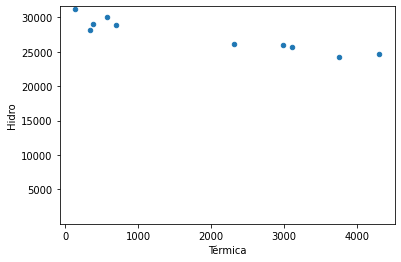

In [34]:
data.plot.scatter(x=var,y='Hidro',ylim=(0.5500));